# Linear  Regression using Mutli-Layer-Perceptron

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_pickle('data/df_encoded.pkl')
# df = pd.read_pickle('data/df_ground_truth.pkl')
df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,is_weekend,month_April,...,month_November,month_October,month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
datetime,,,,,,,,,,,,,,,,,,,,,
2004-10-03 18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,1,0,...,0,1,0,0,0,0,1,0,0,0
2004-10-03 22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,1,0,...,0,1,0,0,0,0,1,0,0,0


In [15]:
df['TxRH'] = df['T'] * df['RH']

In [16]:
y = df[['PT08.S1(CO)']]
X = df.drop(['PT08.S1(CO)'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=42)

## We will use all the columns ( ones engineered from the datetime index ) to see if we have a significant improvement. Also we will use Neural networks from sklearn's Multi Layer Preceptron to train our model

In [17]:
# model = MLPRegressor()
# parameters = {
#     'hidden_layer_sizes': [(50,50), (100,50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# grid = GridSearchCV(model,parameters,n_jobs=-1, cv=3)
# grid.fit(X,y)

# print('Best parameters found:\n', grid.best_params_)

In [18]:
best_model = MLPRegressor(activation='relu', alpha=0.05, hidden_layer_sizes=(100,50), learning_rate='constant', solver='adam')
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

/home/manoj/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/manoj/.virtualenvs/datascience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


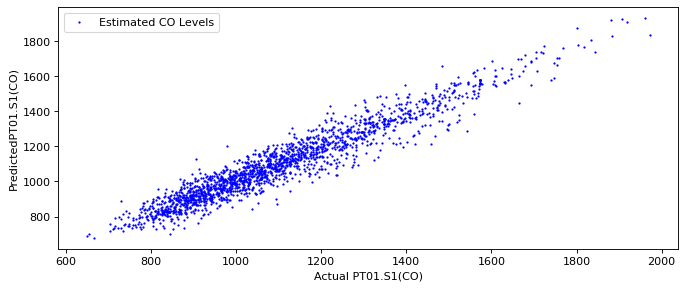

In [19]:
col_name='PT01.S1(CO)'
fig = plt.figure(dpi=80, figsize=(10, 4))
ax = fig.add_subplot(111)
ax.scatter(y_test, y_pred, c='b', label='Estimated CO Levels', s = 1)
ax.set_xlabel('Actual '+col_name)
ax.set_ylabel('Predicted'+col_name)
plt.legend()

In [20]:
print("The Prediction R\u00b2 score is {}".format(round(best_model.score(X_train,y_train),3)))

The Prediction R² score is 0.928


## This is not any different from linear regression yeilding a score of 0.921. we see only a marginal improvement in score. As you saw from the correlation matrix, features/columns which did not have much influence on the target columns. 